In [3]:
#EDA-1

In [4]:
#Heart Failure Clinical Records Dataset

## Data Reading process

In [5]:
data=r'C:\Users\ASUS\Desktop\temp pwskill\notes\assignment\notes\EDA assignment -1\heart_failure_clinical_records_dataset.csv'

In [6]:
data

'C:\\Users\\ASUS\\Desktop\\temp pwskill\\notes\\assignment\\notes\\EDA assignment -1\\heart_failure_clinical_records_dataset.csv'

In [7]:
import pandas as pd
import seaborn as sns 
import  matplotlib.pyplot as plt

In [8]:
df=pd.read_csv(data)

In [9]:
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [11]:

import warnings
warnings.filterwarnings('ignore')



In [12]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [13]:
df['age'].dtype

dtype('float64')

## Questions and answer

### What is the distribution of age among heart failure patients in the dataset


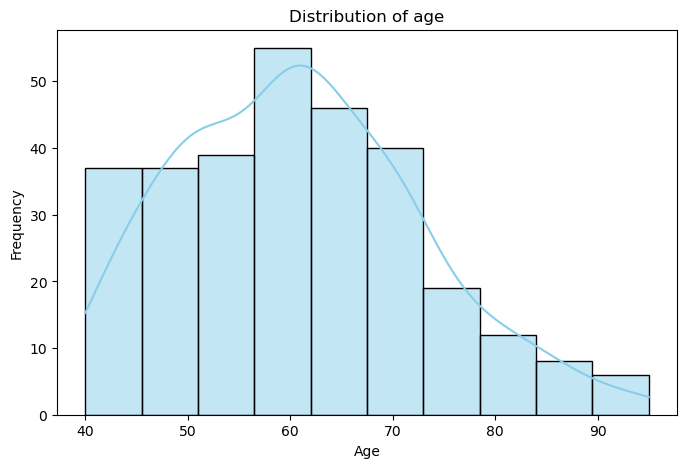

In [14]:
plt.figure(figsize = (8,5))
sns.histplot(df['age'].dropna(), kde = True, color = 'skyblue')
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show() 


#mean age in around 60
#less number of people belongs to 75 to 100 age 
#maximum number of people belong to 55 to 65 age

### How does the death rate vary with age

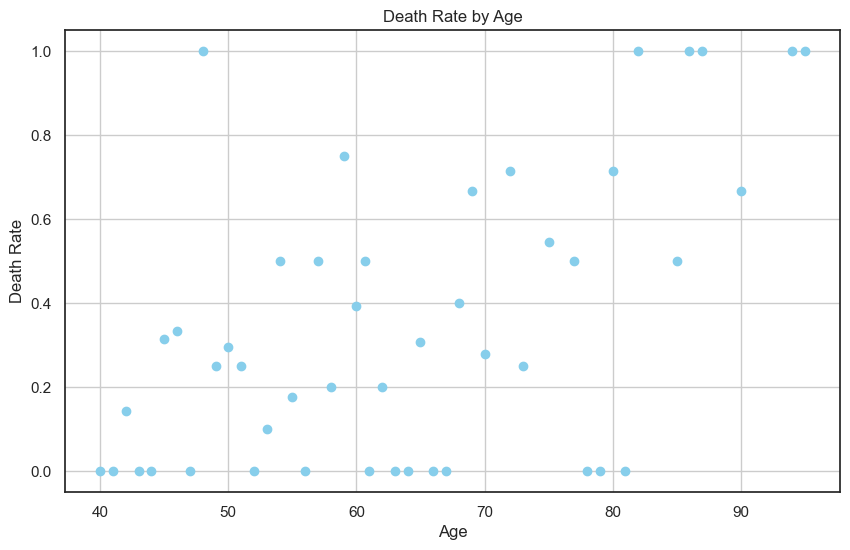

In [28]:
death_rate_by_age = df.groupby('age')['DEATH_EVENT'].mean()

# Plot the death rate by age using a bar graph
plt.figure(figsize=(10, 6))
plt.scatter(death_rate_by_age.index, death_rate_by_age.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.title('Death Rate by Age')
plt.grid(True)
plt.show()

#Death rate increases with age: The general trend in the scatter plot shows that as age increases, the death rate tends to rise. This is a common demographic pattern.

### What is the percentage of male and female patients in the dataset

sex
1    64.882943
0    35.117057
Name: count, dtype: float64


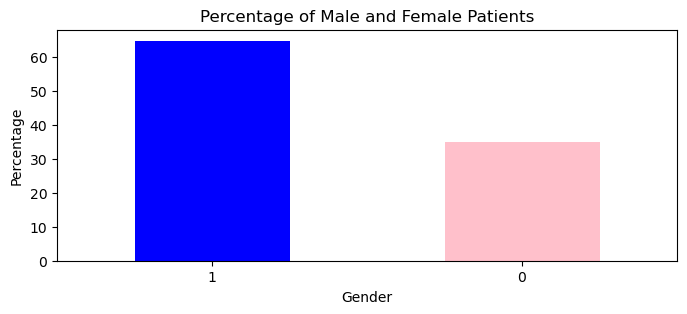

In [16]:
# Calculate the count of each gender
gender_counts = df['sex'].value_counts()

# Calculate the percentage of each gender
gender_percentage = gender_counts / gender_counts.sum() * 100

# Print the percentage
print(gender_percentage)

# Plot the percentage of male and female patients
plt.figure(figsize=(8, 3))
gender_percentage.plot(kind='bar', color=['blue', 'pink'])
plt.title('Percentage of Male and Female Patients')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

#In the dataset the percentage of male in more the Female
# male percentage - 64.882943,Female percentage - 35.117057

### how does the platelet count vary amoung different age groups

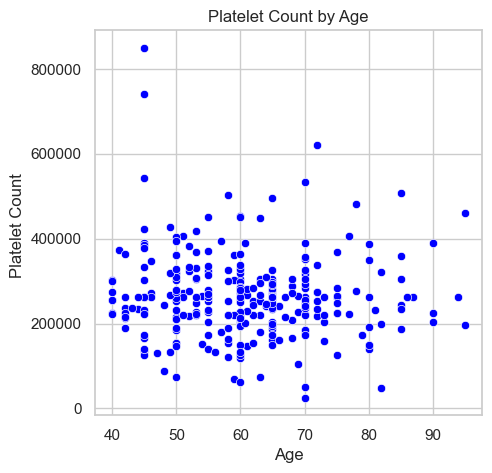

In [17]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(5,5))
sns.scatterplot(x='age', y='platelets', data=df, color='blue')

# Add titles and labels
plt.title('Platelet Count by Age')
plt.xlabel('Age')
plt.ylabel('Platelet Count ')

# Show the plot
plt.show()

# according to dataset the platelets count gradually decrease with respect to age
# The more number of platelets are found in 45 age people 
# The 200000 to 400000 platelets found in all group of age.
# The 200000 to 400000 platelets found in 60 to 70

### Is there a correlation b/w creatinine and sodium levels in the blood

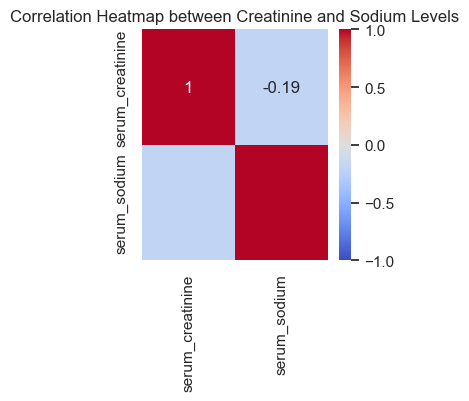

Correlation coefficient between Creatinine and Sodium: -0.19


In [18]:
df1 =df[['serum_creatinine','serum_sodium']]
correlation_matrix = df1.corr()

# Set the style of seaborn
sns.set(style="white")

# Create the heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Add titles and labels
plt.title('Correlation Heatmap between Creatinine and Sodium Levels')
plt.show()

# Print the correlation coefficient
print(f"Correlation coefficient between Creatinine and Sodium: {correlation_matrix.loc['serum_creatinine', 'serum_sodium']:.2f}")

#A value of -0.19 suggests a very weak inverse relationship between creatinine and sodium levels
#generally, as creatinine levels increase, sodium levels might slightly decrease, but the relationship is not strong or consistent.

### how does the prevalence of high blood pressure differ b/w male and female patients

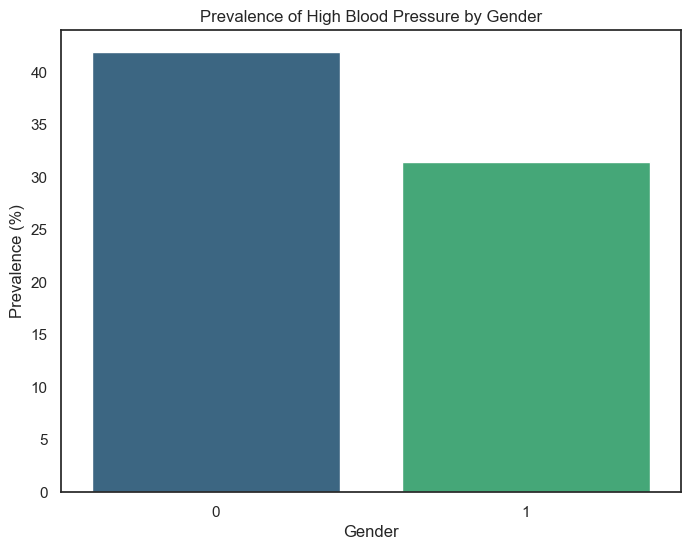

Prevalence of High Blood Pressure:
sex
0    41.904762
1    31.443299
Name: high_blood_pressure, dtype: float64


In [19]:

# Calculate the count of high blood pressure cases by gender
prevalence = df.groupby('sex')['high_blood_pressure'].mean() * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=prevalence.index, y=prevalence.values, palette='viridis')

# Add titles and labels
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Prevalence (%)')

# Show the plot
plt.show()

# Print the prevalence percentages
print(f"Prevalence of High Blood Pressure:\n{prevalence}")

#prevalence of High blood pressure in female more the male. 

### what is the relationship b/w smoking habits and the occurence of heart failure

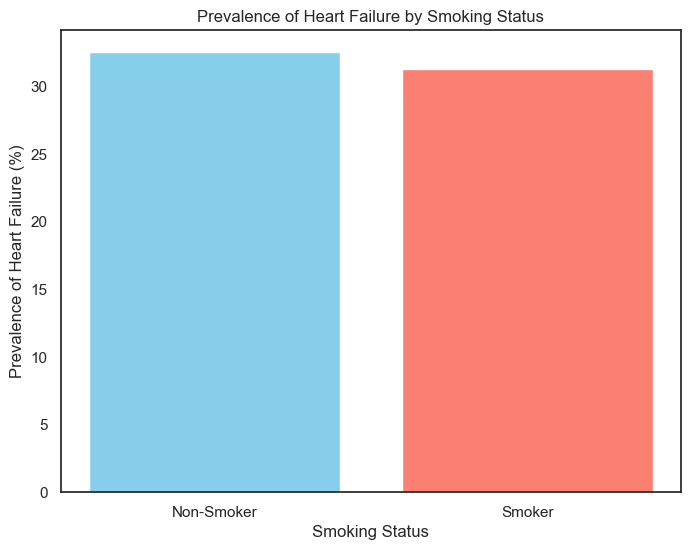

Prevalence of Heart Failure by Smoking Status:
Non-Smoker    32.512315
Smoker        31.250000
Name: DEATH_EVENT, dtype: float64


In [20]:


# Calculate the prevalence of heart failure by smoking status
prevalence = df.groupby('smoking')['DEATH_EVENT'].mean() * 100

# Map smoking status to labels
prevalence.index = ['Non-Smoker', 'Smoker']

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(prevalence.index, prevalence.values, color=['skyblue', 'salmon'])

# Add titles and labels
plt.title('Prevalence of Heart Failure by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Prevalence of Heart Failure (%)')

# Show the plot
plt.show()

# Print the prevalence percentages
print(f"Prevalence of Heart Failure by Smoking Status:\n{prevalence}")

In [21]:
df.columns


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

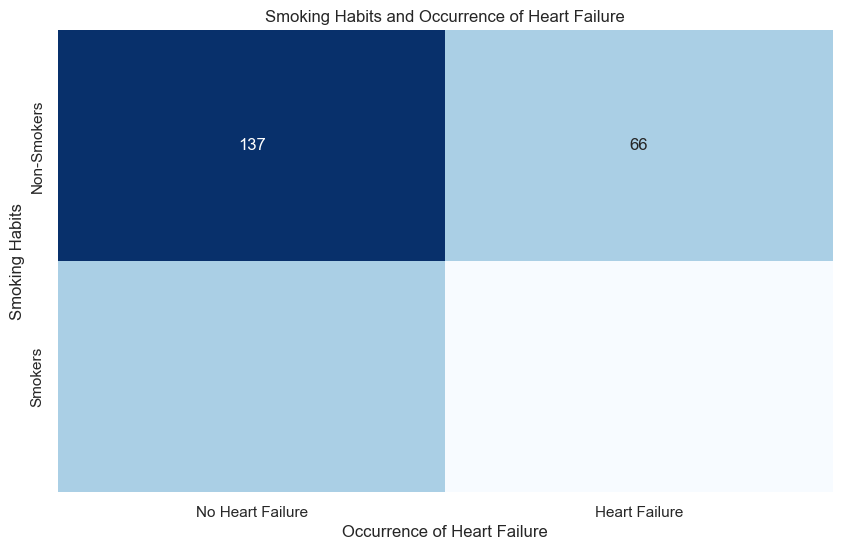

In [22]:
# Create a contingency table
contingency_table = pd.crosstab(df['smoking'], df['DEATH_EVENT'])

# Plotting the relationship
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['No Heart Failure', 'Heart Failure'],
            yticklabels=['Non-Smokers', 'Smokers'])
plt.title('Smoking Habits and Occurrence of Heart Failure')
plt.xlabel('Occurrence of Heart Failure')
plt.ylabel('Smoking Habits')
plt.show()

# higher count in the "Heart Failure" column for "Smokers" compared to "Non-Smokers" suggests a potential association between smoking and heart failure.

### Are there any noticeable patterns in the ditribution of death events  across different age groups

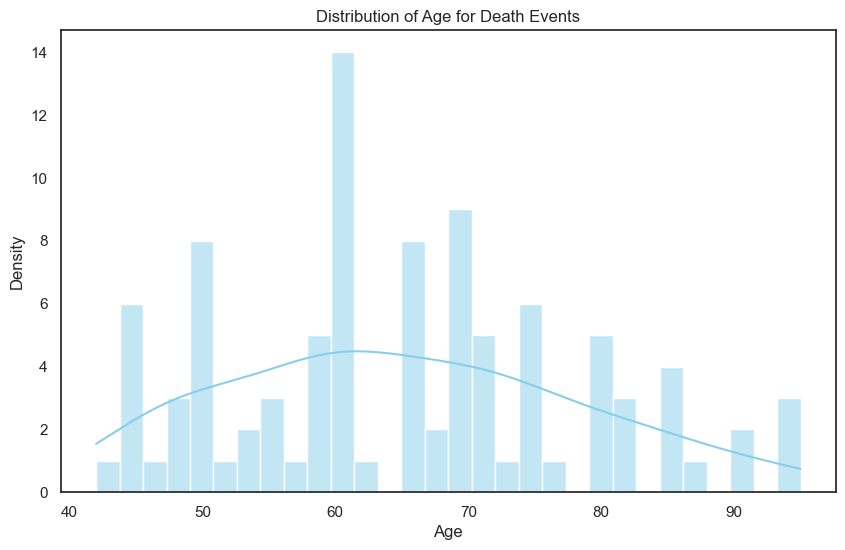

In [33]:

# Calculate the death rate for each age
death_events = df[df['DEATH_EVENT'] == 1]

# Plot the distribution of age for death events using distplot
plt.figure(figsize=(10, 6))
sns.histplot(death_events['age'], kde=True, color='skyblue', bins=30)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Distribution of Age for Death Events')
plt.show()

#istribution of age at death, showing a peak around age 60 and a smaller peak around age 80, with a general increase in frequency as age rises.

### Is there any significant difference in ejection fraction between patients with and without diabetes

          count       mean        std   min   25%   50%   75%   max
diabetes                                                           
0         174.0  38.132184  12.247439  14.0  30.0  38.0  45.0  80.0
1         125.0  38.016000  11.283719  15.0  30.0  38.0  40.0  62.0


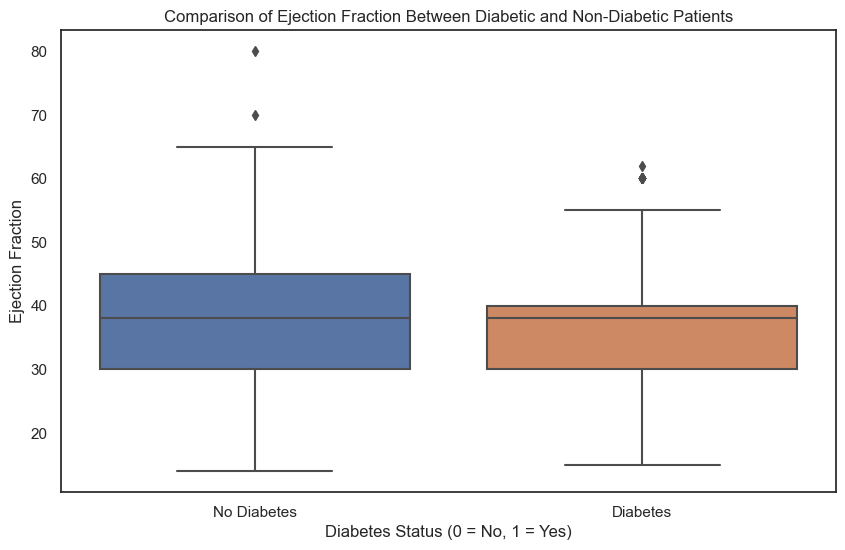

diabetes
0    38.132184
1    38.016000
Name: ejection_fraction, dtype: float64


In [23]:
print(df.groupby('diabetes')['ejection_fraction'].describe())

# Create a boxplot to compare ejection fraction between diabetic and non-diabetic patients
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='ejection_fraction', data=df)
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.ylabel('Ejection Fraction')
plt.title('Comparison of Ejection Fraction Between Diabetic and Non-Diabetic Patients')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

# Calculate mean ejection fraction for each group
mean_ejection_fraction = df.groupby('diabetes')['ejection_fraction'].mean()
print(mean_ejection_fraction)

#Ejection Fraction (EF) is lower in diabetic patients compared to non-diabetic patients
#The distribution of EF is wider in diabetic patients.
#There are some diabetic patients with very high EF values.




### How does the serum creatinine level vary  between patient who survived and those who did not

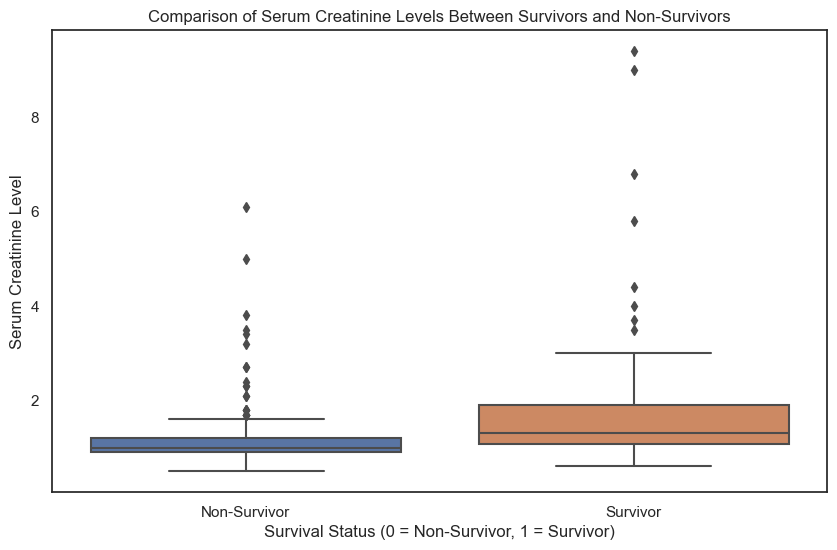

In [24]:
# Create a boxplot to compare serum creatinine levels between survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.xlabel('Survival Status (0 = Non-Survivor, 1 = Survivor)')
plt.ylabel('Serum Creatinine Level')
plt.title('Comparison of Serum Creatinine Levels Between Survivors and Non-Survivors')
plt.xticks([0, 1], ['Non-Survivor', 'Survivor'])
plt.show()

#the box plot suggests a strong association between higher serum creatinine levels and non-survival.
#The median serum creatinine level is significantly higher in non-survivors compared to survivors. This indicates that, on average, patients who did not survive had higher creatinine levels.


In [25]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
